In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('gold price.csv')

In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


# Correlation

1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

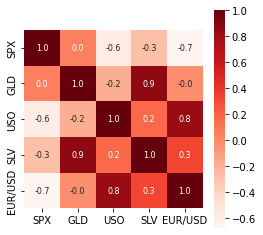

In [13]:
# constructing a heatmap to understand a coorelation
plt.figure(figsize=(4,4))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [14]:
#coorelation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


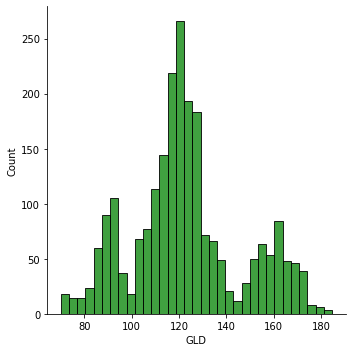

In [16]:
#checking the distribution of gold price
sns.displot(gold_data['GLD'],color='Green')

In [18]:
data = gold_data.drop(['Date', 'GLD'], axis = 1)
label = gold_data['GLD']

In [20]:
data.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(data,label,test_size=.2,random_state=2)

In [23]:
print(data.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Model Training

In [24]:
Model = RandomForestRegressor(n_estimators=99)

In [25]:
Model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=99)

# Model Evaluation

In [26]:
test_data_prediction = Model.predict(X_test)

In [27]:
print(test_data_prediction)

[168.52797909  82.03515125 116.09636394 127.52070783 120.87050628
 154.86989644 150.20302895 126.04797999 117.5944434  125.98181915
 116.5442431  171.78888972 141.58545343 167.68080671 115.12111126
 117.54636423 138.1362661  170.06747582 159.87485121 157.8207068
 155.12141444 125.02414127 175.87909035 157.007579   125.24888952
  93.72141406  77.51747506 120.58767684 119.03515127 167.5130302
  88.36434411 125.11525265  91.02505111 117.79585857 121.09141296
 136.08646592 115.45899066 115.49131379 146.29686884 107.17454628
 104.19626512  87.10828058 126.45878835 118.13202038 152.23737265
 119.62474759 108.55979803 107.95626045  93.26040433 127.09535146
  75.28282828 113.60151416 121.2698987  111.23838313 119.12161541
 120.59494848 158.77010117 168.21424389 147.15928972  85.75959427
  94.27090951  86.83919043  90.69959584 119.11454612 126.44929356
 127.55171716 169.61161586 122.24626175 117.46474631  98.45575795
 167.79545523 143.08131181 131.57121446 121.07757771 121.68676697
 119.6546469

In [29]:
#R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [30]:
print(error_score)

0.9892618916676763


# Compare the actual and predictive value

In [31]:
Y_test=list(Y_test)

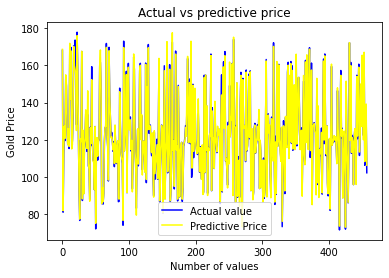

In [34]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='yellow',label='Predictive Price')
plt.title('Actual vs predictive price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()